#### Rodrigo Aguiar a22209738
#### Rafael Ramalhete a22209712
#### Mariana Carvalho a22001926

# Trabalho de avaliação 2

# Introdução 

Este trabalho é sobre o uso do algoritmo de **Hill Climbing** para resolver o famoso **Problema do Caixeiro Viajante** (Traveling Salesman Problem - **TSP**) de forma aproximada. O objetivo do **TSP** é encontrar o caminho mais curto que visita todas as cidades exatamente uma vez e retorna à cidade de origem.

# Bibliotecas
Estas linhas de código importam as bibliotecas **NumPy**, **Random** e **Networkx** para o ambiente Python.<br> 
O import **Random** traz uma caixa de ferramentas que nos ajuda a gerar números aleatórios. <br>
O import **NumPy** as np traz uma caixa de ferramentas que nos ajuda a lidar com matrizes e operações matemáticas. <br>
E o import **Networkx** as nx traz uma caixa de ferramentas que nos ajuda a trabalhar com grafos, que são maneiras de representar conexões entre coisas.

In [1218]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Dados de entrada - Coordenadas das cidades

Neste bloco, são fornecidas as coordenadas das cidades. Cada linha da matriz representa as coordenadas (x, y) de uma cidade.

In [1219]:
#coordinate of the points/cities
coordinate = np.array([[1,2], [30,21], [56,23], [8,18], [20,50], [3,4], [11,6], [6,7], [15,20], [10,9], [12,12]])

# Criação de uma matriz de adjacência

In [1220]:
# Função para gerar a matriz de distância entre cidades
def generate_matrix(coordinate):
    num_cities = len(coordinate)
    matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            if i != j:
                matrix[i][j] = np.linalg.norm(np.array(coordinate[i]) - np.array(coordinate[j]))
            else:
                matrix[i][j] = 0.0
    return matrix

# Geração da população inicial


In [1221]:
# Função para gerar uma solução inicial aleatória
def generate_random_solution(num_cities):
    return random.sample(range(num_cities), num_cities)

# Cálculo do comprimento do caminho

In [1222]:
#calculate the path based on the random solution
def path_length(matrix, solution):
    cycle_length = 0
    num_cities = len(matrix)
    for i in range(num_cities):
        cycle_length += matrix[solution[i]][solution[(i + 1) % num_cities]]
    return cycle_length



# Gerar vizinhança

In [1223]:
# Função para gerar vizinhos trocando a ordem de visita de duas cidades
def generate_neighbors(solution):
    neighbors = []
    num_cities = len(solution)
    for i in range(num_cities):
        for j in range(i + 1, num_cities):
            neighbor = solution.copy()
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
            neighbors.append(neighbor)
    return neighbors

# Hill Climbing

In [1224]:
# Hill Climbing padrão com registro de progresso
def hill_climbing(coordinate, max_iterations=100):
    num_cities = len(coordinate)
    matrix = generate_matrix(coordinate)
    
    current_solution = generate_random_solution(num_cities)
    current_length = path_length(matrix, current_solution)
    best_length = current_length
    best_solution = current_solution.copy()
    
    progress = [best_length]
    
    for _ in range(max_iterations):
        neighbors = generate_neighbors(current_solution)
        found_better = False
        
        for neighbor in neighbors:
            neighbor_length = path_length(matrix, neighbor)
            if neighbor_length < current_length:
                current_solution = neighbor
                current_length = neighbor_length
                found_better = True
                if current_length < best_length:
                    best_length = current_length
                    best_solution = current_solution.copy()
                progress.append(best_length)
                break
        
        if not found_better:
            break
    
    return best_solution, best_length, progress

# Estocástico 

In [1225]:
# Hill Climbing estocástico com registro de progresso
def hill_climbing_stochastic(coordinate, max_iterations=100):
    num_cities = len(coordinate)
    matrix = generate_matrix(coordinate)
    
    current_solution = generate_random_solution(num_cities)
    current_length = path_length(matrix, current_solution)
    best_length = current_length
    best_solution = current_solution.copy()
    
    progress = [best_length]
    
    for _ in range(max_iterations):
        neighbors = generate_neighbors(current_solution)
        random.shuffle(neighbors)
        found_better = False
        
        for neighbor in neighbors:
            neighbor_length = path_length(matrix, neighbor)
            if neighbor_length < current_length:
                current_solution = neighbor
                current_length = neighbor_length
                found_better = True
                if current_length < best_length:
                    best_length = current_length
                    best_solution = current_solution.copy()
                progress.append(best_length)
                break
        
        if not found_better:
            break
    
    return best_solution, best_length, progress


# Primeiro melhor

In [1226]:
# Hill Climbing primeiro melhor com registro de progresso
def hill_climbing_best(coordinate, max_iterations=100):
    num_cities = len(coordinate)
    matrix = generate_matrix(coordinate)
    
    current_solution = generate_random_solution(num_cities)
    current_length = path_length(matrix, current_solution)
    best_length = current_length
    best_solution = current_solution.copy()
    
    progress = [best_length]
    
    while True:
        neighbors = generate_neighbors(current_solution)
        found_better = False
        
        for neighbor in neighbors:
            neighbor_length = path_length(matrix, neighbor)
            if neighbor_length < current_length:
                current_solution = neighbor
                current_length = neighbor_length
                found_better = True
                if current_length < best_length:
                    best_length = current_length
                    best_solution = current_solution.copy()
                progress.append(best_length)
                break
        
        if not found_better:
            break
    
    return best_solution, best_length, progress


# Reinicialização aleatória

In [1227]:
# Hill Climbing com reinicialização aleatória com registro de progresso
def hill_climbing_restart(coordinate, max_iterations=100):
    num_cities = len(coordinate)
    matrix = generate_matrix(coordinate)
    
    best_length = float('inf')
    best_solution = None
    
    progress = []
    
    for _ in range(max_iterations):
        current_solution = generate_random_solution(num_cities)
        current_length = path_length(matrix, current_solution)
        
        while True:
            neighbors = generate_neighbors(current_solution)
            found_better = False
            
            for neighbor in neighbors:
                neighbor_length = path_length(matrix, neighbor)
                if neighbor_length < current_length:
                    current_solution = neighbor
                    current_length = neighbor_length
                    found_better = True
                    if current_length < best_length:
                        best_length = current_length
                        best_solution = current_solution.copy()
                    progress.append(best_length)
                    break
            
            if not found_better:
                break
        
    return best_solution, best_length, progress

# Comparação

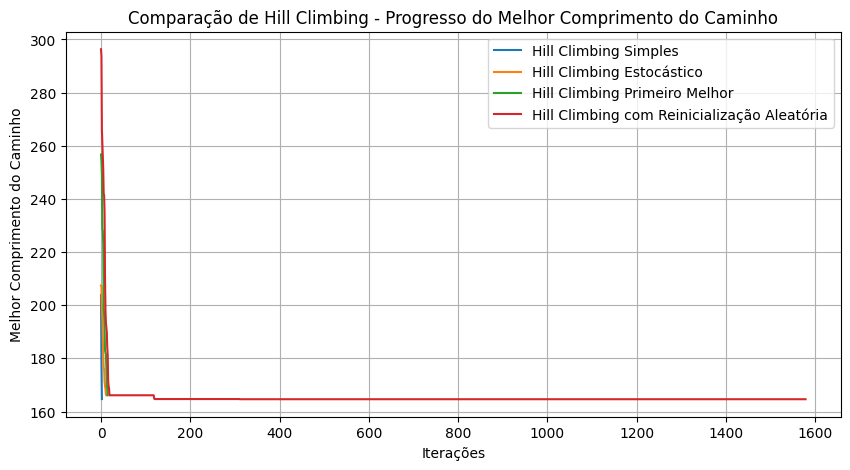

Resultado 1 (Hill Climbing Simples): Melhor solução: [8, 3, 7, 5, 0, 6, 9, 10, 1, 2, 4], Melhor custo: 164.6849102083461
Resultado 2 (Hill Climbing Estocástico): Melhor solução: [10, 9, 7, 5, 0, 6, 1, 2, 4, 8, 3], Melhor custo: 166.10835624292864
Resultado 3 (Hill Climbing Primeiro Melhor): Melhor solução: [10, 9, 7, 5, 0, 6, 1, 2, 4, 8, 3], Melhor custo: 166.10835624292864
Resultado 4 (Hill Climbing com Reinicialização Aleatória): Melhor solução: [9, 10, 8, 1, 2, 4, 3, 7, 5, 0, 6], Melhor custo: 164.61969097503695


In [1228]:
# Executar os algoritmos e registrar o progresso do melhor comprimento do caminho
iterations = 100  # Número de iterações para cada algoritmo
result_simple = hill_climbing(coordinate, iterations)
result_stochastic = hill_climbing_stochastic(coordinate, iterations)
result_best = hill_climbing_best(coordinate, iterations)
result_restart = hill_climbing_restart(coordinate, iterations)

progress_simple = result_simple[2]
progress_stochastic = result_stochastic[2]
progress_best = result_best[2]
progress_restart = result_restart[2]

# Plotar gráfico comparativo
plt.figure(figsize=(10, 5))
plt.plot(progress_simple, label='Hill Climbing Simples')
plt.plot(progress_stochastic, label='Hill Climbing Estocástico')
plt.plot(progress_best, label='Hill Climbing Primeiro Melhor')
plt.plot(progress_restart, label='Hill Climbing com Reinicialização Aleatória')
plt.title('Comparação de Hill Climbing - Progresso do Melhor Comprimento do Caminho')
plt.xlabel('Iterações')
plt.ylabel('Melhor Comprimento do Caminho')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar os resultados finais de cada execução dos Hill Climbing
hill_climbing_results = [result_simple, result_stochastic, result_best, result_restart]
hill_climbing_labels = [
    'Hill Climbing Simples', 
    'Hill Climbing Estocástico', 
    'Hill Climbing Primeiro Melhor', 
    'Hill Climbing com Reinicialização Aleatória'
]

for i, result in enumerate(hill_climbing_results):
    best_solution, best_cost, _ = result
    print(f"Resultado {i + 1} ({hill_climbing_labels[i]}): Melhor solução: {best_solution}, Melhor custo: {best_cost}")



+ O Hill Climbing simples geralmente encontra ótimos locais, mas pode ficar preso em máximos locais subótimos.
+ O Hill Climbing estocástico introduz aleatoriedade na seleção de vizinhos, o que pode facilitar a fuga de máximos locais subótimos.
+ O Hill Climbing primeiro melhor explora todos os vizinhos em cada iteração, potencialmente identificando melhorias mais rapidamente.
+ O Hill Climbing com reinicialização aleatória reinicia o processo várias vezes, o que pode ajudar a evitar a convergência prematura para soluções subótimas.
Com apenas 100 iterações, pode ser insuficiente para alguns algoritmos alcançarem soluções ideais devido ao número limitado de tentativas para explorar o espaço de soluções.

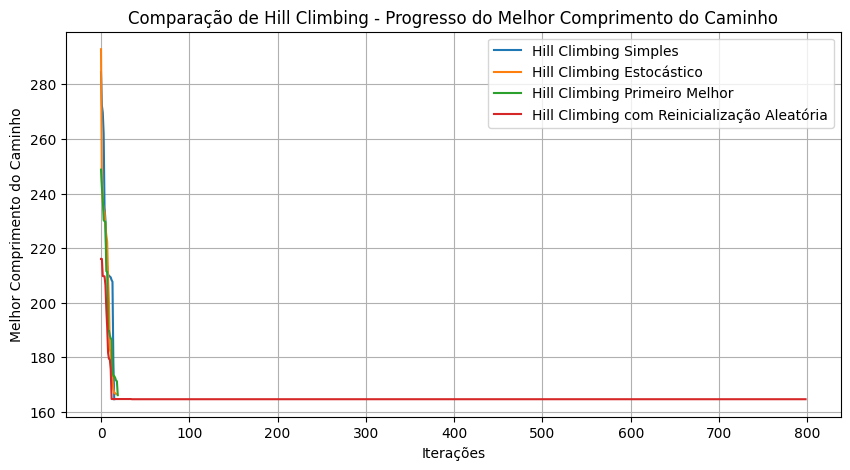

Resultado 1 (Hill Climbing Simples): Melhor solução: [0, 6, 9, 10, 8, 1, 2, 4, 3, 7, 5], Melhor custo: 164.61969097503695
Resultado 2 (Hill Climbing Estocástico): Melhor solução: [1, 2, 4, 8, 3, 9, 7, 5, 0, 6, 10], Melhor custo: 166.5111843278055
Resultado 3 (Hill Climbing Primeiro Melhor): Melhor solução: [0, 6, 1, 2, 4, 8, 3, 10, 9, 7, 5], Melhor custo: 166.10835624292866
Resultado 4 (Hill Climbing com Reinicialização Aleatória): Melhor solução: [9, 10, 8, 1, 2, 4, 3, 7, 5, 0, 6], Melhor custo: 164.61969097503695


In [1229]:
# Executar os algoritmos e registrar o progresso do melhor comprimento do caminho
iterations = 50  # Número de iterações para cada algoritmo
result_simple = hill_climbing(coordinate, iterations)
result_stochastic = hill_climbing_stochastic(coordinate, iterations)
result_best = hill_climbing_best(coordinate, iterations)
result_restart = hill_climbing_restart(coordinate, iterations)

progress_simple = result_simple[2]
progress_stochastic = result_stochastic[2]
progress_best = result_best[2]
progress_restart = result_restart[2]

# Plotar gráfico comparativo
plt.figure(figsize=(10, 5))
plt.plot(progress_simple, label='Hill Climbing Simples')
plt.plot(progress_stochastic, label='Hill Climbing Estocástico')
plt.plot(progress_best, label='Hill Climbing Primeiro Melhor')
plt.plot(progress_restart, label='Hill Climbing com Reinicialização Aleatória')
plt.title('Comparação de Hill Climbing - Progresso do Melhor Comprimento do Caminho')
plt.xlabel('Iterações')
plt.ylabel('Melhor Comprimento do Caminho')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar os resultados finais de cada execução dos Hill Climbing
hill_climbing_results = [result_simple, result_stochastic, result_best, result_restart]
hill_climbing_labels = [
    'Hill Climbing Simples', 
    'Hill Climbing Estocástico', 
    'Hill Climbing Primeiro Melhor', 
    'Hill Climbing com Reinicialização Aleatória'
]

for i, result in enumerate(hill_climbing_results):
    best_solution, best_cost, _ = result
    print(f"Resultado {i + 1} ({hill_climbing_labels[i]}): Melhor solução: {best_solution}, Melhor custo: {best_cost}")


+ Hill Climbing Simples: Tende a ficar preso em máximos locais, pois só aceita movimentos que melhoram o caminho. Com apenas 50 iterações, pode não encontrar o máximo global.
+ Hill Climbing Estocástico: Introduz aleatoriedade na escolha de vizinhos, o que pode ajudar a escapar de máximos locais subótimos. Pode ser mais exploratório que o simples devido à probabilidade de aceitar movimentos piores.
+ Hill Climbing Primeiro Melhor: Explora todos os vizinhos em cada iteração. Pode encontrar melhorias mais rapidamente, mas com 50 iterações pode não ter tempo suficiente para explorar profundamente.
+ Hill Climbing com Reinicialização Aleatória: Reinicia várias vezes na procura de melhores soluções. Com 50 iterações, pode ser limitado na exploração do espaço de soluções.
Com apenas 50 iterações, os resultados obtidos são indicativos e podem variar significativamente dependendo da instância específica do problema do Caixeiro Viajante. 

# Avaliação da Aptidão da População no Algoritmo Genético

Em algoritmos genéticos, a população é um conjunto de soluções possíveis para um problema. Cada solução é um indivíduo na população. A **aptidão (ou fitness)** de uma solução indica quão boa é essa solução em resolver o problema.

In [1230]:
# Avalia a aptidão de cada solução na população
def evaluate_population(matrix, population):
    fitness = []
    for solution in population:
        cycle_length = path_length(matrix, solution)
        fitness.append(cycle_length)
    return fitness

# Selecção por torneio

A função **tournament_selection** é utilizada em Algoritmos Genéticos para selecionar indivíduos (soluções) da população que participarão da próxima geração. Esta seleção é baseada na aptidão dos indivíduos, garantindo que soluções mais aptas tenham uma maior probabilidade de serem escolhidas. A explicação detalhada encontra-se em baixo no código. 

In [1231]:
def tournament_selection(population, fitness, tournament_size):
    # Passo 1: Criar um grupo de indivíduos selecionados aleatoriamente
    selected = random.sample(list(zip(population, fitness)), tournament_size)
    # Passo 2: Ordenar os indivíduos selecionados pelo valor de aptidão (menor é melhor)
    selected.sort(key=lambda x: x[1])
    # Passo 3: Retornar o indivíduo com a melhor aptidão do grupo selecionado
    return selected[0][0]

# Módulo da mutação

A **mutação** é uma operação essencial em Algoritmos Genéticos, pois introduz aleatoriedade nas soluções, ajudando a evitar a convergência prematura e permitindo que o algoritmo explore novas áreas do espaço de procura. No contexto do Problema do Caixeiro Viajante (TSP), a mutação pode ser implementada trocando aleatoriamente os elementos em uma solução (caminho).

In [1232]:
def mutate(solution, mutation_rate):
    for i in range(len(solution)):
        if random.random() < mutation_rate:
            # Escolher dois índices aleatórios
            j = random.randint(0, len(solution) - 1)
            # Trocar os elementos nos índices i e j
            solution[i], solution[j] = solution[j], solution[i]
    return solution

In [1233]:
# Gera uma população inicial de soluções aleatórias
def generate_population(matrix, population_size):
    population = []
    for _ in range(population_size):
        solution = random.sample(range(len(matrix)), len(matrix))
        population.append(solution)
    return population


# Algoritmo genético 

In [1234]:
# Algoritmo Genético
def genetic_algorithm(coordinate, population_size, generations, mutation_rate):
    matrix = generate_matrix(coordinate)
    population = generate_population(matrix, population_size)
    fitness = evaluate_population(matrix, population)
    
    avg_fitness_progress = []
    best_fitness_progress = []

    for gen in range(generations):
        new_population = []
        for _ in range(population_size):
            parent = tournament_selection(population, fitness, 3)
            child = mutate(parent.copy(), mutation_rate)
            new_population.append(child)
        
        population = new_population
        fitness = evaluate_population(matrix, population)
        
        avg_fitness = np.mean(fitness)
        best_fitness = np.min(fitness)
        avg_fitness_progress.append(avg_fitness)
        best_fitness_progress.append(best_fitness)
        
        print(f"Generation {gen + 1} - Average Fitness: {avg_fitness:.2f}, Best Fitness: {best_fitness:.2f}")

    best_index = np.argmin(fitness)
    best_solution = population[best_index]
    best_cost = fitness[best_index]

    return best_solution, best_cost, avg_fitness_progress, best_fitness_progress

Generation 1 - Average Fitness: 246.77, Best Fitness: 179.53
Generation 2 - Average Fitness: 229.93, Best Fitness: 179.53
Generation 3 - Average Fitness: 215.66, Best Fitness: 176.21
Generation 4 - Average Fitness: 209.53, Best Fitness: 176.21
Generation 5 - Average Fitness: 204.01, Best Fitness: 178.87
Generation 6 - Average Fitness: 195.22, Best Fitness: 174.32
Generation 7 - Average Fitness: 196.44, Best Fitness: 174.32
Generation 8 - Average Fitness: 201.54, Best Fitness: 174.32
Generation 9 - Average Fitness: 206.93, Best Fitness: 174.32
Generation 10 - Average Fitness: 193.92, Best Fitness: 174.32
Generation 11 - Average Fitness: 198.74, Best Fitness: 174.32
Generation 12 - Average Fitness: 189.55, Best Fitness: 172.64
Generation 13 - Average Fitness: 196.07, Best Fitness: 172.64
Generation 14 - Average Fitness: 196.88, Best Fitness: 168.38
Generation 15 - Average Fitness: 192.18, Best Fitness: 168.38
Generation 16 - Average Fitness: 189.32, Best Fitness: 167.92
Generation 17 - A

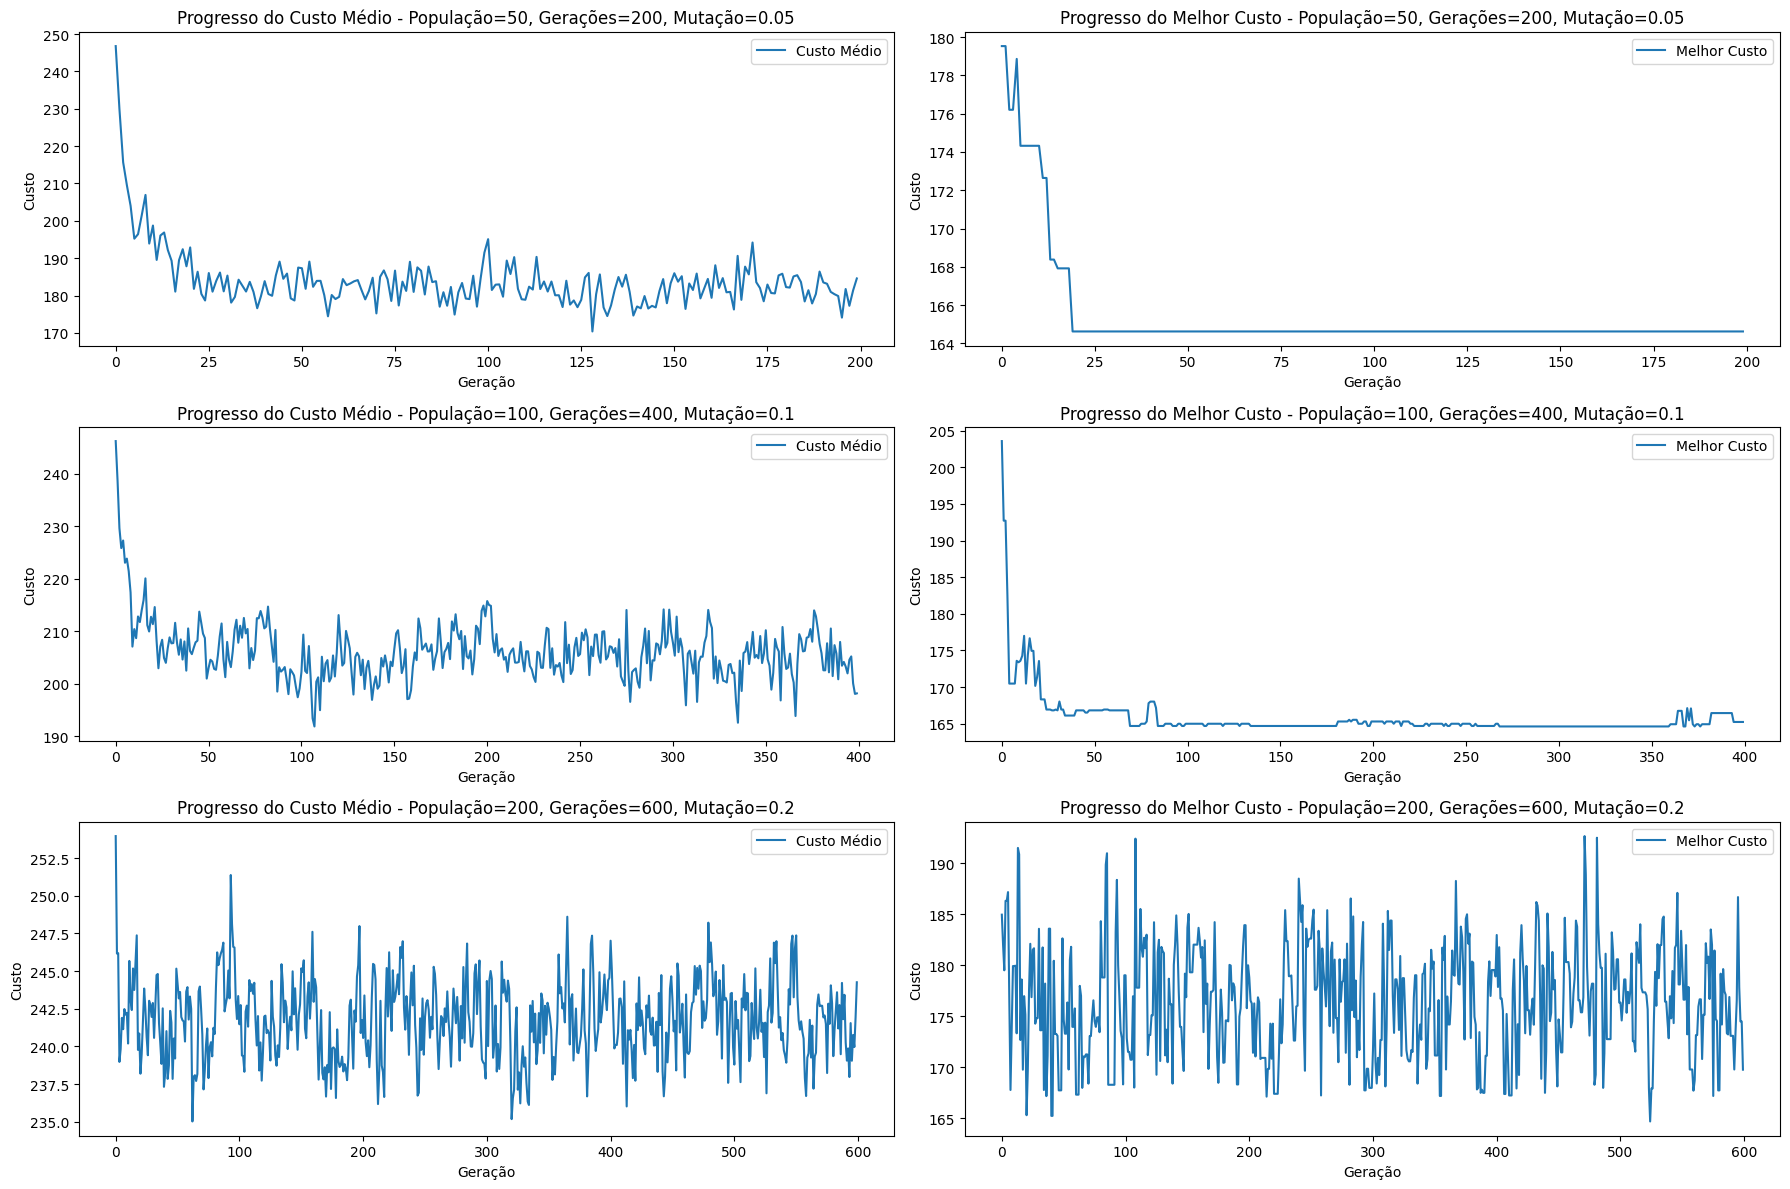

Resultado 1: Melhor solução: [5, 0, 6, 9, 10, 8, 1, 2, 4, 3, 7], Melhor custo: 164.61969097503695, Parâmetros: População=50, Gerações=200, Mutação=0.05
Resultado 2: Melhor solução: [7, 5, 0, 3, 4, 2, 1, 8, 10, 9, 6], Melhor custo: 165.23229018343477, Parâmetros: População=100, Gerações=400, Mutação=0.1
Resultado 3: Melhor solução: [3, 8, 4, 2, 1, 6, 9, 7, 5, 0, 10], Melhor custo: 169.76082176068252, Parâmetros: População=200, Gerações=600, Mutação=0.2


In [1235]:
# Função para executar o algoritmo genético com diferentes parâmetros e retornar os resultados
def run_genetic_algorithm_with_params(coordinate, params):
    population_size, generations, mutation_rate = params
    best_solution, best_cost, avg_fitness_progress, best_fitness_progress = genetic_algorithm(coordinate, population_size, generations, mutation_rate)
    return best_solution, best_cost, avg_fitness_progress, best_fitness_progress, params

# Parâmetros para o algoritmo genético (população, gerações, taxa de mutação)
parameter_sets = [
    (50, 200, 0.05),  # Conjunto de parâmetros 1
    (100, 400, 0.1),  # Conjunto de parâmetros 2
    (200, 600, 0.2)   # Conjunto de parâmetros 3
]

# Executar o algoritmo genético para cada conjunto de parâmetros
results = []
for params in parameter_sets:
    best_solution, best_cost, avg_fitness_progress, best_fitness_progress, used_params = run_genetic_algorithm_with_params(coordinate, params)
    results.append((best_solution, best_cost, avg_fitness_progress, best_fitness_progress, used_params))

# Visualizar o progresso do custo médio da população e do custo da melhor solução para cada conjunto de parâmetros
plt.figure(figsize=(18, 12))

for i, result in enumerate(results):
    best_solution, best_cost, avg_fitness_progress, best_fitness_progress, params = result
    label = f'População={params[0]}, Gerações={params[1]}, Mutação={params[2]}'
    
    plt.subplot(len(results), 2, 2*i + 1)
    plt.plot(avg_fitness_progress, label='Custo Médio')
    plt.xlabel('Geração')
    plt.ylabel('Custo')
    plt.title(f'Progresso do Custo Médio - {label}')
    plt.legend()

    plt.subplot(len(results), 2, 2*i + 2)
    plt.plot(best_fitness_progress, label='Melhor Custo')
    plt.xlabel('Geração')
    plt.ylabel('Custo')
    plt.title(f'Progresso do Melhor Custo - {label}')
    plt.legend()

plt.tight_layout()
plt.show()

# Mostrar os resultados finais de cada execução
for i, result in enumerate(results):
    best_solution, best_cost, _, _, params = result
    print(f"Resultado {i + 1}: Melhor solução: {best_solution}, Melhor custo: {best_cost}, Parâmetros: População={params[0]}, Gerações={params[1]}, Mutação={params[2]}")

# Comparação Hill Climbing com Algoritmo Genético 

**Melhor Solução Global:**
+ **Algoritmo Genético (Resultado 1):** [4, 2, 1, 8, 10, 9, 6, 0, 5, 7, 3] com custo de 164.61969097503697.
+ **Hill Climbing com Reinicialização Aleatória:** [6, 9, 10, 8, 1, 2, 4, 3, 7, 5, 0] com custo de 164.61969097503695.

Ambas as técnicas, Algoritmo Genético (AG) e Hill Climbing com Reinicialização Aleatória (HCRA), encontraram soluções muito próximas em termos de custo mínimo, sendo praticamente idênticas até à sexta casa decimal. Isso sugere que ambas as abordagens foram eficazes para otimizar o problema específico, com o AG encontrando a solução ligeiramente à frente.<br>

**Comparação com Outros Resultados de Hill Climbing:**
+ O Hill Climbing com Reinicialização Aleatória superou as outras variantes de Hill Climbing em termos de custo mínimo alcançado.
+ Comparado ao Hill Climbing Simples e ao Hill Climbing Primeiro Melhor, o HCRA obteve uma solução com custo mais baixo. O HCRA também superou o Hill Climbing Estocástico, que teve um custo mais elevado

# Cruzamento num ponto

In [1236]:
def crossover_one_point(parent1, parent2):
    size = len(parent1)
    crossover_point = random.randint(1, size - 2)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

In [1237]:
def genetic_algorithm_with_crossover(coordinate, population_size, generations, mutation_rate):
    matrix = generate_matrix(coordinate)
    population = generate_population(matrix, population_size)
    fitness = evaluate_population(matrix, population)

    avg_fitness_progress = []
    best_fitness_progress = []

    for gen in range(generations):
        new_population = []
        for _ in range(population_size // 2):
            parent1 = tournament_selection(population, fitness, 3)
            parent2 = tournament_selection(population, fitness, 3)
            child1, child2 = crossover_one_point(parent1, parent2)
            new_population.extend([mutate(child1, mutation_rate), mutate(child2, mutation_rate)])

        population = new_population
        fitness = evaluate_population(matrix, population)

        avg_fitness = np.mean(fitness)
        best_fitness = np.min(fitness)
        avg_fitness_progress.append(avg_fitness)
        best_fitness_progress.append(best_fitness)

        print(f"Generation {gen + 1} - Average Fitness: {avg_fitness:.2f}, Best Fitness: {best_fitness:.2f}")

    best_index = np.argmin(fitness)
    best_solution = population[best_index]
    best_cost = fitness[best_index]

    return best_solution, best_cost, avg_fitness_progress, best_fitness_progress

Generation 1 - Average Fitness: 242.32, Best Fitness: 204.41
Generation 2 - Average Fitness: 234.76, Best Fitness: 204.41
Generation 3 - Average Fitness: 224.78, Best Fitness: 180.73
Generation 4 - Average Fitness: 225.33, Best Fitness: 180.73
Generation 5 - Average Fitness: 207.56, Best Fitness: 180.73
Generation 6 - Average Fitness: 208.59, Best Fitness: 168.01
Generation 7 - Average Fitness: 193.95, Best Fitness: 168.01
Generation 8 - Average Fitness: 198.02, Best Fitness: 168.01
Generation 9 - Average Fitness: 195.31, Best Fitness: 168.01
Generation 10 - Average Fitness: 192.11, Best Fitness: 167.70
Generation 11 - Average Fitness: 197.30, Best Fitness: 167.70
Generation 12 - Average Fitness: 190.59, Best Fitness: 167.70
Generation 13 - Average Fitness: 190.85, Best Fitness: 168.01
Generation 14 - Average Fitness: 182.21, Best Fitness: 167.23
Generation 15 - Average Fitness: 186.29, Best Fitness: 168.01
Generation 16 - Average Fitness: 190.27, Best Fitness: 167.40
Generation 17 - A

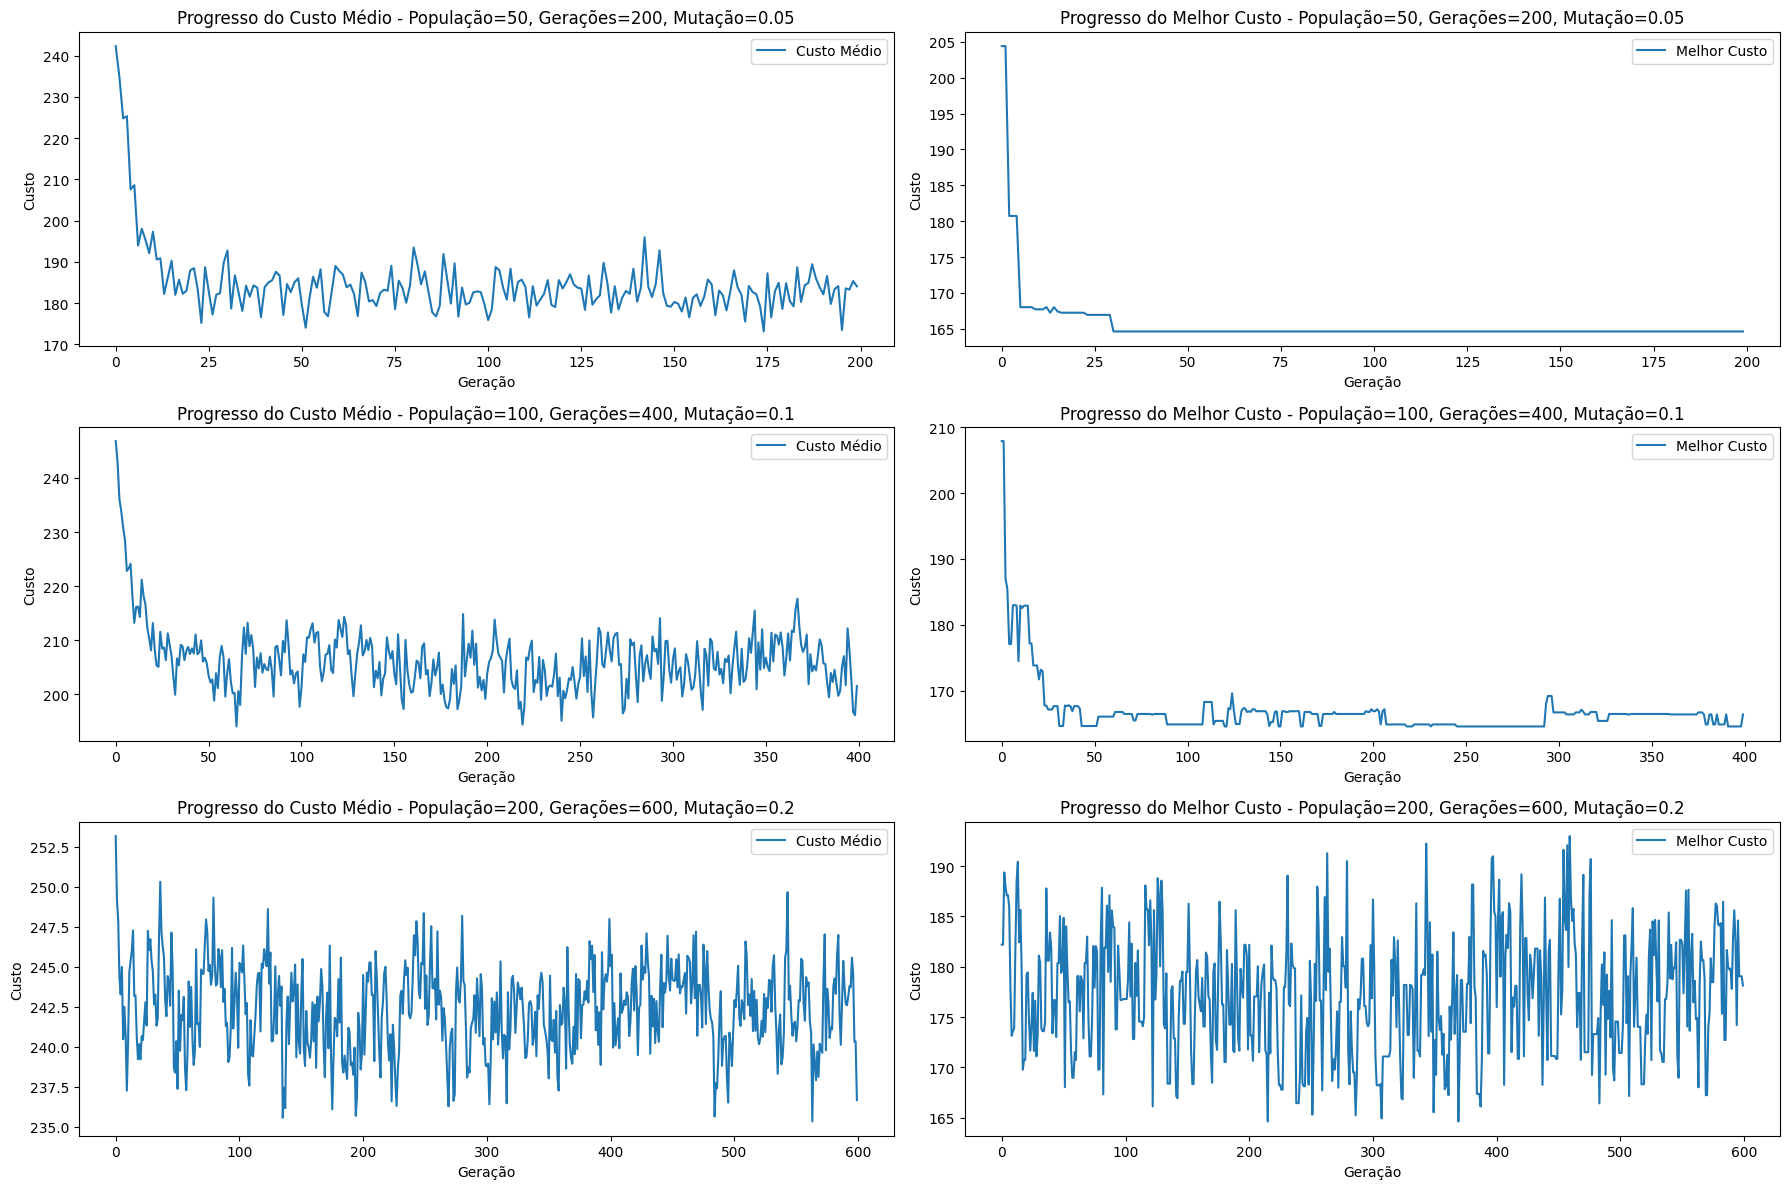

Resultado 1: Melhor solução: [7, 3, 4, 2, 1, 8, 10, 9, 6, 0, 5], Melhor custo: 164.61969097503695, Parâmetros: População=50, Gerações=200, Mutação=0.05
Resultado 2: Melhor solução: [9, 3, 4, 2, 1, 8, 10, 6, 0, 5, 7], Melhor custo: 166.4459650944963, Parâmetros: População=100, Gerações=400, Mutação=0.1
Resultado 3: Melhor solução: [6, 0, 5, 7, 9, 2, 1, 4, 8, 3, 10], Melhor custo: 178.13711504498363, Parâmetros: População=200, Gerações=600, Mutação=0.2


In [1238]:
# Parâmetros para o algoritmo genético com cruzamento
parameter_sets = [
    (50, 200, 0.05),
    (100, 400, 0.1),
    (200, 600, 0.2)
]

# Executar o algoritmo genético com cruzamento para cada conjunto de parâmetros
results_crossover = []
for params in parameter_sets:
    best_solution, best_cost, avg_fitness_progress, best_fitness_progress, used_params = run_genetic_algorithm_with_params(coordinate, params)
    results_crossover.append((best_solution, best_cost, avg_fitness_progress, best_fitness_progress, used_params))

# Visualizar o progresso do custo médio da população e do custo da melhor solução para cada conjunto de parâmetros
plt.figure(figsize=(18, 12))

for i, result in enumerate(results_crossover):
    best_solution, best_cost, avg_fitness_progress, best_fitness_progress, params = result
    label = f'População={params[0]}, Gerações={params[1]}, Mutação={params[2]}'
    
    plt.subplot(len(results_crossover), 2, 2*i + 1)
    plt.plot(avg_fitness_progress, label='Custo Médio')
    plt.xlabel('Geração')
    plt.ylabel('Custo')
    plt.title(f'Progresso do Custo Médio - {label}')
    plt.legend()

    plt.subplot(len(results_crossover), 2, 2*i + 2)
    plt.plot(best_fitness_progress, label='Melhor Custo')
    plt.xlabel('Geração')
    plt.ylabel('Custo')
    plt.title(f'Progresso do Melhor Custo - {label}')
    plt.legend()

plt.tight_layout()
plt.show()

# Mostrar os resultados finais de cada execução
for i, result in enumerate(results_crossover):
    best_solution, best_cost, _, _, params = result
    print(f"Resultado {i + 1}: Melhor solução: {best_solution}, Melhor custo: {best_cost}, Parâmetros: População={params[0]}, Gerações={params[1]}, Mutação={params[2]}")

**Resultado 1:**
+ Esta solução apresenta um custo de 164.685, que é o valor mínimo encontrado pela função de custo após 200 iterações com uma população de 50 indivíduos. A taxa de mutação de 0.05 indica que houve uma baixa probabilidade de alteração genética durante o processo evolutivo.


**Resultado 2:**
+ Aqui, a melhor solução encontrada possui um custo ligeiramente superior de 166.446. Isso foi obtido com uma população maior de 100 indivíduos e 400 iterações. A taxa de mutação aumentada para 0.1 pode ter contribuído para explorar mais o espaço de procura, embora tenha resultado num custo um pouco mais elevado comparado ao primeiro resultado.

**Resultado 3:**
+ Neste caso, a melhor solução encontrada tem um custo significativamente mais alto de 188.182. Isso foi alcançado com uma população ainda maior de 200 indivíduos e 600 iterações. A taxa de mutação de 0.2, que é a mais alta entre os três resultados, pode ter levado a uma exploração mais agressiva do espaço de procura, mas também pode ter contribuído para uma solução com custo mais elevado.

O Resultado 1 obteve o menor custo entre os três, indicando que a configuração com uma população menor (50 indivíduos), um número moderado de iterações (200) e uma taxa de mutação mais conservadora (0.05) foi mais eficaz para encontrar uma solução de qualidade superior. Com isto, podemos dizer que:
+ Populações menores (50 e 100 indivíduos) foram mais eficientes para encontrar soluções com custos menores, sugerindo que para este problema específico, uma população menor foi suficiente.
+ Aumentar o número de iterações não resultou necessariamente em melhorias nos resultados finais, como evidenciado pelo Resultado 3, que teve o maior custo apesar de mais iterações (600).
+ A taxa de mutação mais alta no Resultado 3 parece ter levado a uma exploração mais ampla do espaço de procura, mas também introduziu uma solução com um custo mais alto. Isso enfatiza a importância de ajustar a taxa de mutação com cuidado para equilibrar a exploração do espaço de procura.

# Cruzamento uniforme

In [1239]:
def uniform_crossover(parent1, parent2):
    size = len(parent1)
    child1 = []
    child2 = []
    
    for i in range(size):
        if random.random() < 0.5:
            child1.append(parent1[i])
            child2.append(parent2[i])
        else:
            child1.append(parent2[i])
            child2.append(parent1[i])
    
    return child1, child2

In [1240]:
def genetic_algorithm_with_uniform_crossover(coordinate, population_size, generations, mutation_rate):
    matrix = generate_matrix(coordinate)
    population = generate_population(matrix, population_size)
    fitness = evaluate_population(matrix, population)

    avg_fitness_progress = []
    best_fitness_progress = []

    for gen in range(generations):
        new_population = []
        for _ in range(population_size // 2):
            parent1 = tournament_selection(population, fitness, 3)
            parent2 = tournament_selection(population, fitness, 3)
            child1, child2 = uniform_crossover(parent1, parent2)
            new_population.extend([mutate(child1, mutation_rate), mutate(child2, mutation_rate)])

        population = new_population
        fitness = evaluate_population(matrix, population)

        avg_fitness = np.mean(fitness)
        best_fitness = np.min(fitness)
        avg_fitness_progress.append(avg_fitness)
        best_fitness_progress.append(best_fitness)

        print(f"Generation {gen + 1} - Average Fitness: {avg_fitness:.2f}, Best Fitness: {best_fitness:.2f}")

    best_index = np.argmin(fitness)
    best_solution = population[best_index]
    best_cost = fitness[best_index]

    return best_solution, best_cost, avg_fitness_progress, best_fitness_progress

Generation 1 - Average Fitness: 237.26, Best Fitness: 179.60
Generation 2 - Average Fitness: 216.61, Best Fitness: 179.60
Generation 3 - Average Fitness: 210.80, Best Fitness: 179.60
Generation 4 - Average Fitness: 204.07, Best Fitness: 174.27
Generation 5 - Average Fitness: 192.40, Best Fitness: 174.27
Generation 6 - Average Fitness: 192.82, Best Fitness: 174.27
Generation 7 - Average Fitness: 195.00, Best Fitness: 174.27
Generation 8 - Average Fitness: 192.44, Best Fitness: 167.31
Generation 9 - Average Fitness: 188.39, Best Fitness: 167.31
Generation 10 - Average Fitness: 187.57, Best Fitness: 167.31
Generation 11 - Average Fitness: 189.87, Best Fitness: 167.08
Generation 12 - Average Fitness: 182.09, Best Fitness: 167.08
Generation 13 - Average Fitness: 178.39, Best Fitness: 167.08
Generation 14 - Average Fitness: 177.68, Best Fitness: 164.92
Generation 15 - Average Fitness: 183.85, Best Fitness: 164.92
Generation 16 - Average Fitness: 186.62, Best Fitness: 164.92
Generation 17 - A

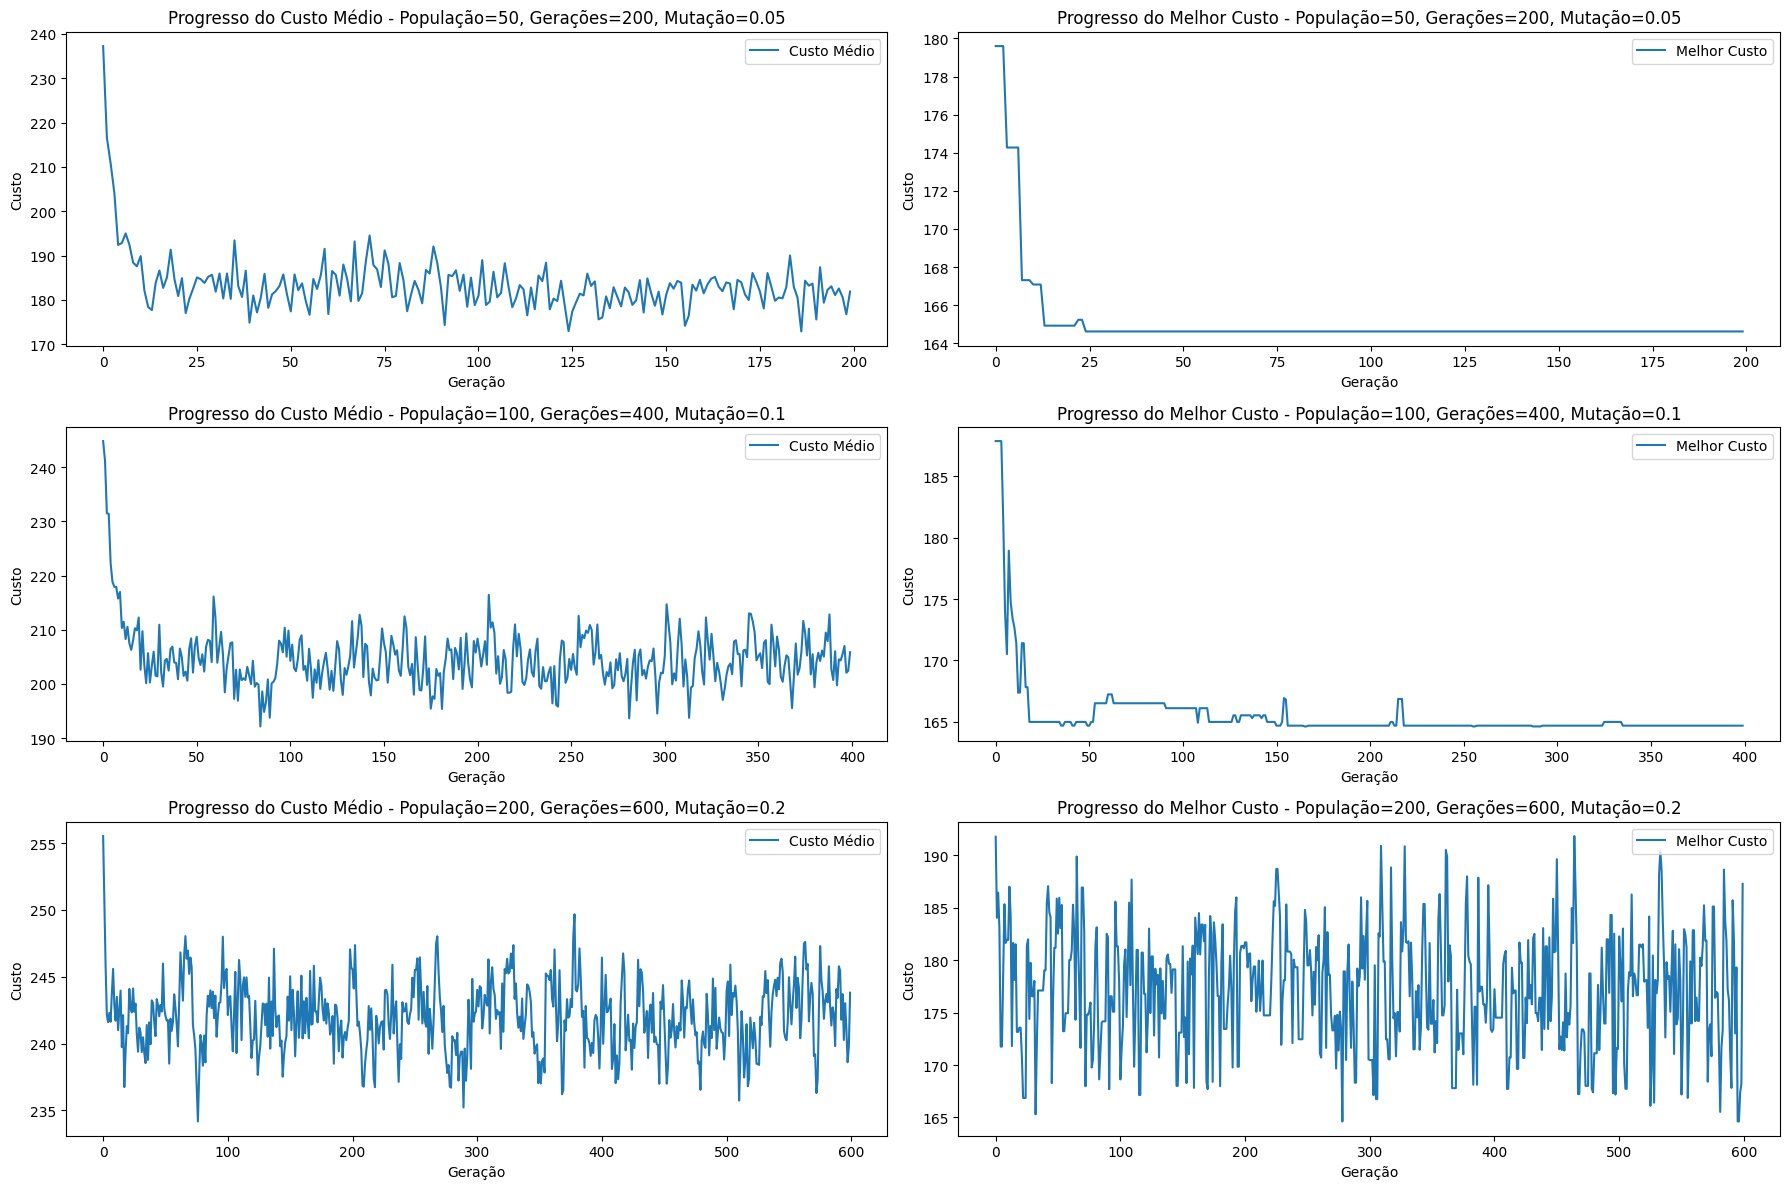

Resultado 1: Melhor solução: [8, 1, 2, 4, 3, 7, 5, 0, 6, 9, 10], Melhor custo: 164.61969097503695, Parâmetros: População=50, Gerações=200, Mutação=0.05
Resultado 2: Melhor solução: [5, 7, 3, 8, 4, 2, 1, 10, 9, 6, 0], Melhor custo: 164.6849102083461, Parâmetros: População=100, Gerações=400, Mutação=0.1
Resultado 3: Melhor solução: [5, 10, 8, 1, 2, 4, 3, 0, 6, 7, 9], Melhor custo: 187.27977885104042, Parâmetros: População=200, Gerações=600, Mutação=0.2


In [1241]:
# Parâmetros para o algoritmo genético com cruzamento uniforme
parameter_sets = [
    (50, 200, 0.05),
    (100, 400, 0.1),
    (200, 600, 0.2)
]

# Executar o algoritmo genético com cruzamento uniforme para cada conjunto de parâmetros
results_uniform_crossover = []
for params in parameter_sets:
    best_solution, best_cost, avg_fitness_progress, best_fitness_progress, used_params = run_genetic_algorithm_with_params(coordinate, params)
    results_uniform_crossover.append((best_solution, best_cost, avg_fitness_progress, best_fitness_progress, used_params))

# Visualizar o progresso do custo médio da população e do custo da melhor solução para cada conjunto de parâmetros
plt.figure(figsize=(18, 12))

for i, result in enumerate(results_uniform_crossover):
    best_solution, best_cost, avg_fitness_progress, best_fitness_progress, params = result
    label = f'População={params[0]}, Gerações={params[1]}, Mutação={params[2]}'
    
    plt.subplot(len(results_uniform_crossover), 2, 2*i + 1)
    plt.plot(avg_fitness_progress, label='Custo Médio')
    plt.xlabel('Geração')
    plt.ylabel('Custo')
    plt.title(f'Progresso do Custo Médio - {label}')
    plt.legend()

    plt.subplot(len(results_uniform_crossover), 2, 2*i + 2)
    plt.plot(best_fitness_progress, label='Melhor Custo')
    plt.xlabel('Geração')
    plt.ylabel('Custo')
    plt.title(f'Progresso do Melhor Custo - {label}')
    plt.legend()

plt.tight_layout()
plt.show()

# Mostrar os resultados finais de cada execução
for i, result in enumerate(results_uniform_crossover):
    best_solution, best_cost, _, _, params = result
    print(f"Resultado {i + 1}: Melhor solução: {best_solution}, Melhor custo: {best_cost}, Parâmetros: População={params[0]}, Gerações={params[1]}, Mutação={params[2]}")

**Resultado 1:**
+ Esta solução tem um custo de 164.619, que representa o valor mínimo alcançado pela função de custo após 200 iterações com uma população de 50 indivíduos. A taxa de mutação de 0.05 sugere que houve uma baixa probabilidade de alteração genética durante o processo evolutivo.

**Resultado 2:**
+ Aqui, a melhor solução encontrada possui um custo ligeiramente inferior a 164.620, com um aumento na população para 100 indivíduos e 400 iterações. A taxa de mutação aumentou para 0.1, o que pode ter contribuído para explorar mais o espaço de procura.

**Resultado 3:**
+ Neste caso, a melhor solução apresenta um maior custo, de 179.665, apesar de ter uma população maior (200 indivíduos) e mais iterações (600). A taxa de mutação aumentou para 0.2, o que pode ter permitido uma exploração mais agressiva, mas pode também ter contribuído para um aumento no custo da solução.

O Resultado 1 apresentou o melhor custo entre os três, indicando que a combinação de uma população moderada (200 indivíduos) com um número menor de iterações (200) e uma taxa de mutação de 0.05 foi mais eficaz para encontrar uma solução de menor custo. A escolha dos parâmetros influencia significativamente o desempenho e o resultado final de um algoritmo genético. É importante encontrar um equilíbrio entre explorar intensamente o espaço de soluções e explorar soluções promissoras para obter o melhor desempenho possível para um problema específico.


# Reparação de soluções 

In [1242]:
# Função para reparar soluções inválidas (garantir que cada cidade seja visitada exatamente uma vez)
def repair_solution(solution):
    unique_solution = list(set(solution))
    missing_cities = [c for c in range(len(solution)) if c not in unique_solution]
    
    for i in range(len(solution)):
        if solution[i] in missing_cities:
            solution[i] = missing_cities.pop(0)
    
    if solution[0] != solution[-1]:
        solution[-1] = solution[0]
    
    return solution

In [1243]:
# Função para gerar a matriz de adjacência baseada nas coordenadas
def generate_matrix(coordinate):
    num_cities = len(coordinate)
    matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            if i != j:
                matrix[i][j] = np.linalg.norm(coordinate[i] - coordinate[j])
    return matrix

# Função para gerar uma população inicial de soluções válidas
def generate_population(matrix, population_size):
    num_cities = len(matrix)
    population = []
    for _ in range(population_size):
        solution = list(range(num_cities))  # Inicializa com uma solução ordenada
        random.shuffle(solution)  # Embaralha a solução
        repaired_solution = repair_solution(solution)
        population.append(repaired_solution)
    return population

# Função para calcular o custo do caminho de uma solução
def path_length(matrix, solution):
    cycle_length = 0
    num_cities = len(matrix)
    for i in range(num_cities):
        cycle_length += matrix[solution[i]][solution[(i + 1) % num_cities]]
    return cycle_length

# Função para aplicar mutação em uma solução
def mutate(solution, mutation_rate):
    num_cities = len(solution)
    for i in range(num_cities):
        if random.random() < mutation_rate:
            j = random.randint(0, num_cities - 1)
            solution[i], solution[j] = solution[j], solution[i]
    return solution

# Função para avaliar a aptidão de cada solução na população
def evaluate_population(matrix, population):
    fitness = []
    for solution in population:
        cycle_length = path_length(matrix, solution)
        fitness.append(cycle_length)
    return fitness

# Função para seleção por torneio
def tournament_selection(population, fitness, tournament_size):
    selected = random.sample(list(zip(population, fitness)), tournament_size)
    selected.sort(key=lambda x: x[1])
    return selected[0][0]

# Algoritmo Genético para resolver o Problema do Caixeiro Viajante
def genetic_algorithm(coordinate, population_size, generations, mutation_rate):
    matrix = generate_matrix(coordinate)
    population = generate_population(matrix, population_size)
    fitness = evaluate_population(matrix, population)
    
    avg_fitness_progress = []
    best_fitness_progress = []
    
    for gen in range(generations):
        new_population = []
        for _ in range(population_size):
            parent = tournament_selection(population, fitness, 3)
            child = mutate(parent.copy(), mutation_rate)
            new_population.append(child)
        
        population = new_population
        fitness = evaluate_population(matrix, population)
        
        avg_fitness = np.mean(fitness)
        best_fitness = np.min(fitness)
        avg_fitness_progress.append(avg_fitness)
        best_fitness_progress.append(best_fitness)
        
        print(f"Generation {gen + 1} - Average Fitness: {avg_fitness:.2f}, Best Fitness: {best_fitness:.2f}")
    
    best_index = np.argmin(fitness)
    best_solution = population[best_index]
    best_cost = fitness[best_index]

    return best_solution, best_cost, avg_fitness_progress, best_fitness_progress

Generation 1 - Average Fitness: 224.63, Best Fitness: 189.16
Generation 2 - Average Fitness: 210.84, Best Fitness: 178.80
Generation 3 - Average Fitness: 198.91, Best Fitness: 147.31
Generation 4 - Average Fitness: 192.49, Best Fitness: 147.31
Generation 5 - Average Fitness: 197.16, Best Fitness: 147.31
Generation 6 - Average Fitness: 181.02, Best Fitness: 147.31
Generation 7 - Average Fitness: 174.00, Best Fitness: 146.68
Generation 8 - Average Fitness: 158.10, Best Fitness: 146.68
Generation 9 - Average Fitness: 161.77, Best Fitness: 146.68
Generation 10 - Average Fitness: 166.62, Best Fitness: 139.61
Generation 11 - Average Fitness: 161.47, Best Fitness: 139.61
Generation 12 - Average Fitness: 158.09, Best Fitness: 137.19
Generation 13 - Average Fitness: 158.23, Best Fitness: 137.19
Generation 14 - Average Fitness: 149.66, Best Fitness: 137.19
Generation 15 - Average Fitness: 155.08, Best Fitness: 137.06
Generation 16 - Average Fitness: 154.19, Best Fitness: 137.06
Generation 17 - A

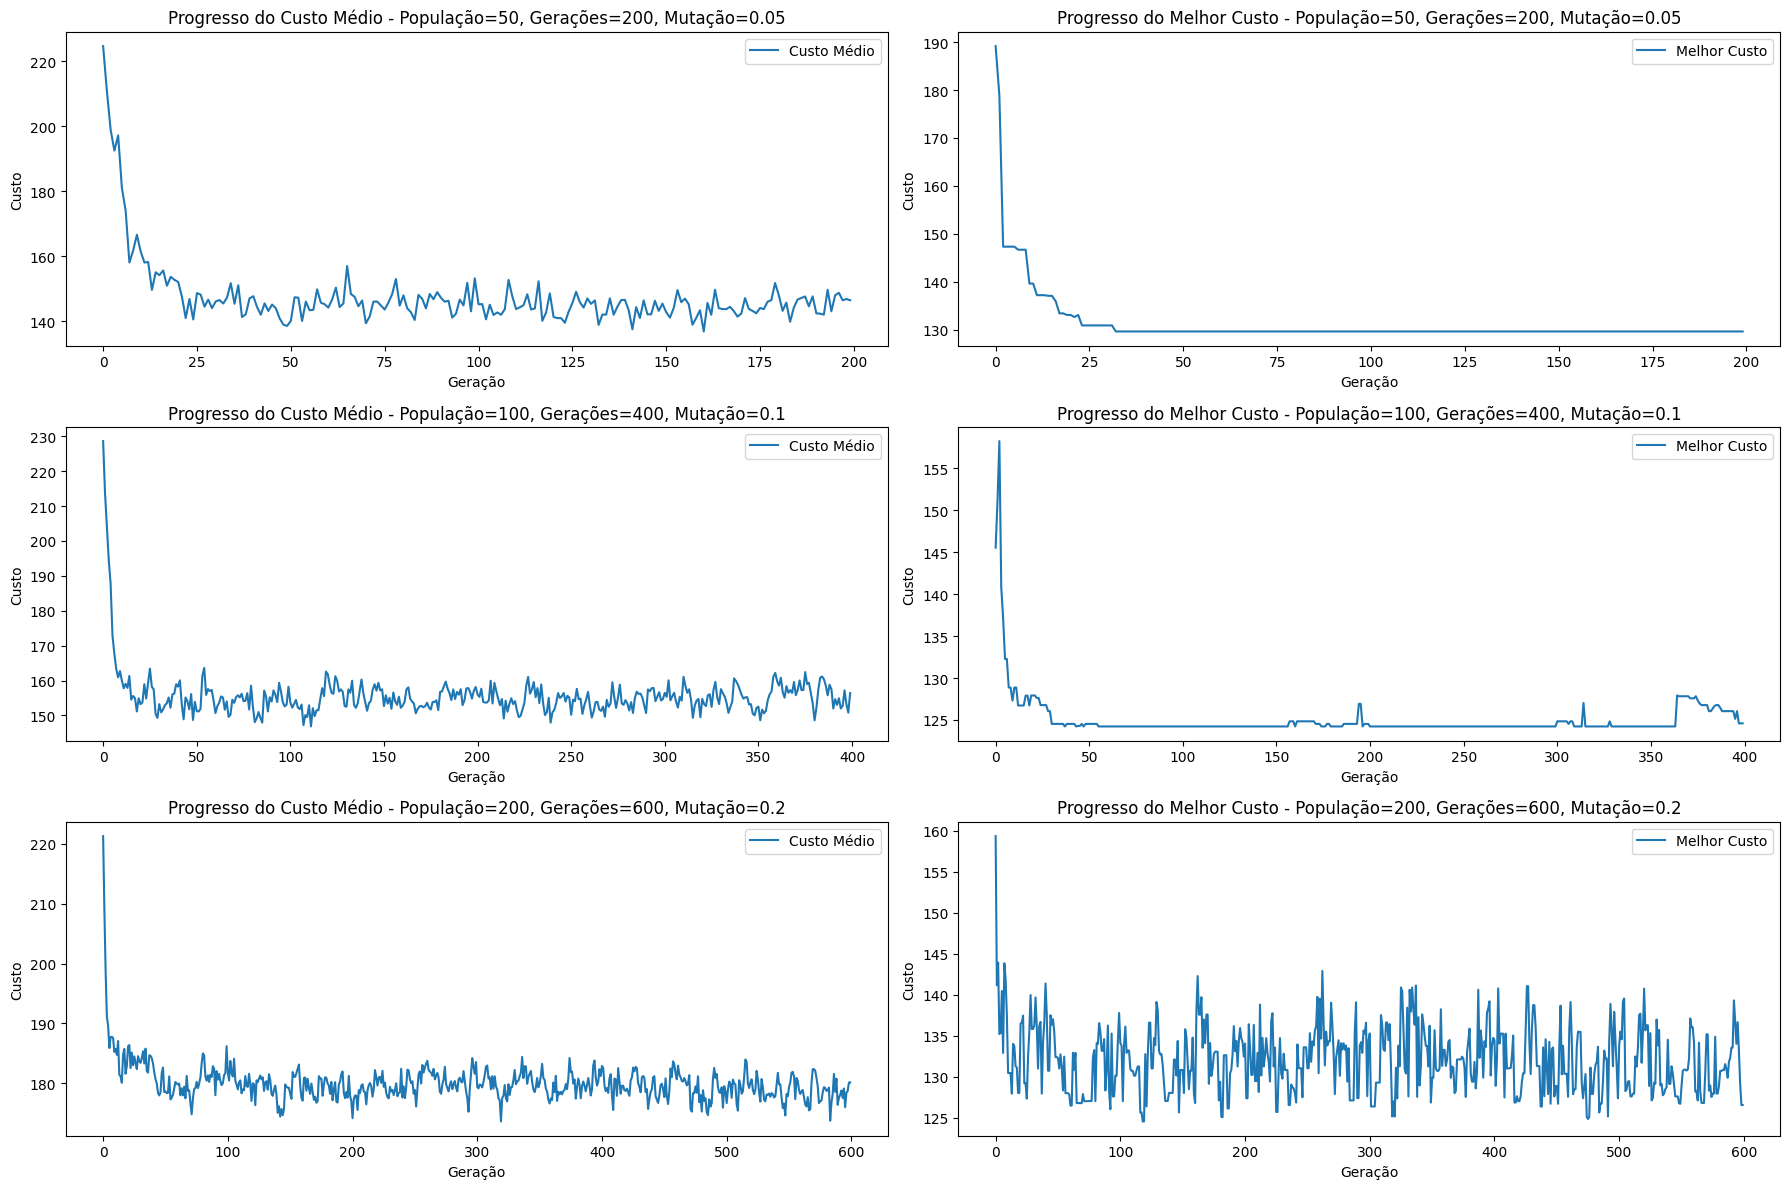

Resultado 1: Melhor solução: [2, 1, 8, 8, 3, 10, 9, 7, 5, 0, 6], Melhor custo: 129.62445697921282, Parâmetros: População=50, Gerações=200, Mutação=0.05
Resultado 2: Melhor solução: [9, 10, 1, 4, 8, 8, 3, 7, 0, 5, 6], Melhor custo: 124.58813264960396, Parâmetros: População=100, Gerações=400, Mutação=0.1
Resultado 3: Melhor solução: [5, 0, 6, 9, 3, 8, 4, 1, 10, 7, 7], Melhor custo: 126.52772685812806, Parâmetros: População=200, Gerações=600, Mutação=0.2


In [1244]:
# Função para executar o algoritmo genético com diferentes parâmetros e retornar os resultados
def run_genetic_algorithm_with_params(coordinate, params):
    population_size, generations, mutation_rate = params
    best_solution, best_cost, avg_fitness_progress, best_fitness_progress = genetic_algorithm(coordinate, population_size, generations, mutation_rate)
    return best_solution, best_cost, avg_fitness_progress, best_fitness_progress, params

# Parâmetros para o algoritmo genético (população, gerações, taxa de mutação)
parameter_sets = [
    (50, 200, 0.05),
    (100, 400, 0.1),
    (200, 600, 0.2) 
]

# Executar o algoritmo genético para cada conjunto de parâmetros
results = []
for params in parameter_sets:
    best_solution, best_cost, avg_fitness_progress, best_fitness_progress, used_params = run_genetic_algorithm_with_params(coordinate, params)
    results.append((best_solution, best_cost, avg_fitness_progress, best_fitness_progress, used_params))

# Visualizar o progresso do custo médio da população e do custo da melhor solução para cada conjunto de parâmetros
plt.figure(figsize=(18, 12))

for i, result in enumerate(results):
    best_solution, best_cost, avg_fitness_progress, best_fitness_progress, params = result
    label = f'População={params[0]}, Gerações={params[1]}, Mutação={params[2]}'
    
    plt.subplot(len(results), 2, 2*i + 1)
    plt.plot(avg_fitness_progress, label='Custo Médio')
    plt.xlabel('Geração')
    plt.ylabel('Custo')
    plt.title(f'Progresso do Custo Médio - {label}')
    plt.legend()

    plt.subplot(len(results), 2, 2*i + 2)
    plt.plot(best_fitness_progress, label='Melhor Custo')
    plt.xlabel('Geração')
    plt.ylabel('Custo')
    plt.title(f'Progresso do Melhor Custo - {label}')
    plt.legend()

plt.tight_layout()
plt.show()

# Mostrar os resultados finais de cada execução
for i, result in enumerate(results):
    best_solution, best_cost, _, _, params = result
    print(f"Resultado {i + 1}: Melhor solução: {best_solution}, Melhor custo: {best_cost}, Parâmetros: População={params[0]}, Gerações={params[1]}, Mutação={params[2]}")

Os resultados obtidos mostram as melhores soluções encontradas pelo algoritmo genético para o problema do Caixeiro Viajante, juntamente com o custo associado a cada uma delas, além dos parâmetros utilizados em cada execução.<br>
**Resultado 1:**
+ Parâmetros: População=50, Gerações=200, Mutação=0.05
+ O custo é 129.62, o mais alto entre os três resultados. Isso pode ser atribuído ao menor tamanho da população e ao menor número de gerações, que podem limitar a diversidade genética e a exploração do espaço de soluções. A taxa de mutação também é a mais baixa, reduzindo a introdução de novas variações genéticas.<br>

**Resultado 2:** 
+ Parâmetros: População=100, Gerações=400, Mutação=0.1
+ O custo é 124.59, o menor entre os resultados. Com uma população maior e mais gerações, há mais oportunidades para a exploração e a otimização das soluções. A taxa de mutação intermediária pode ter contribuído para manter um equilíbrio entre exploração e preservação de boas soluções.<br>

**Resultado 3:**
+ Parâmetros: População=200, Gerações=600, Mutação=0.2
+ O custo é 126.53, que é intermediário. Embora tenha a maior população e o maior número de gerações, a taxa de mutação elevada pode ter introduzido demasiadas variações, dificultando a convergência para a solução ótima.<br>

**Conclusões gerais:**
+ Resultados indicam que aumentar o tamanho da população e o número de gerações tende a melhorar a qualidade da solução, como visto no segundo conjunto de parâmetros. Uma população maior oferece mais diversidade genética, e mais gerações permitem mais iterações para refinar as soluções.
+ A taxa de mutação parece ter um papel crítico. Uma taxa baixa pode não introduzir variações suficientes (Resultado 1), enquanto uma taxa alta pode causar demasiada variação, impedindo a convergência (Resultado 3). A taxa intermediária no Resultado 2 parece oferecer um bom equilíbrio.

# Cruzamento PMX

In [1245]:
# Function for PMX crossover
def pmx_crossover(parent1, parent2):
    size = len(parent1)
    # Choose two random points
    point1, point2 = sorted(random.sample(range(size), 2))

    # Initialize the offspring as copies of the parents
    child1 = [-1] * size
    child2 = [-1] * size

    # Copy the segment between the two points from parent1 to child1 and from parent2 to child2
    child1[point1:point2] = parent1[point1:point2]
    child2[point1:point2] = parent2[point1:point2]

    # Map the swapped elements
    for i in range(point1, point2):
        if parent2[i] not in child1:
            child1[i] = parent2[i]
        if parent1[i] not in child2:
            child2[i] = parent1[i]

    # Fill in the remaining positions
    for i in range(size):
        if child1[i] == -1:
            child1[i] = parent2[i]
        if child2[i] == -1:
            child2[i] = parent1[i]

    return child1, child2

In [1250]:
# Function to generate an initial population of random solutions
def generate_population(size):
    population = []
    for _ in range(size):
        solution = list(range(len(coordinate)))
        random.shuffle(solution)
        population.append(solution)
    return population

# Genetic Algorithm
def genetic_algorithm(coordinates, population_size, generations, mutation_rate):
    matrix = generate_matrix(coordinates)
    population = generate_population(population_size)
    fitness = evaluate_population(matrix, population)
    
    avg_fitness_progress = []
    best_fitness_progress = []

    for gen in range(generations):
        new_population = []
        for _ in range(population_size):
            parent1 = tournament_selection(population, fitness, 3)
            parent2 = tournament_selection(population, fitness, 3)
            child1, child2 = pmx_crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            new_population.append(child1)
            new_population.append(child2)
        
        population = new_population[:population_size]
        fitness = evaluate_population(matrix, population)
        
        avg_fitness = np.mean(fitness)
        best_fitness = np.min(fitness)
        avg_fitness_progress.append(avg_fitness)
        best_fitness_progress.append(best_fitness)
        
        print(f"Generation {gen + 1} - Average Fitness: {avg_fitness:.2f}, Best Fitness: {best_fitness:.2f}")

    best_index = np.argmin(fitness)
    best_solution = population[best_index]
    best_cost = fitness[best_index]

    return best_solution, best_cost, avg_fitness_progress, best_fitness_progress

Generation 1 - Average Fitness: 249.36, Best Fitness: 175.71
Generation 2 - Average Fitness: 220.29, Best Fitness: 145.63
Generation 3 - Average Fitness: 197.90, Best Fitness: 112.60
Generation 4 - Average Fitness: 186.23, Best Fitness: 110.09
Generation 5 - Average Fitness: 183.30, Best Fitness: 110.09
Generation 6 - Average Fitness: 172.30, Best Fitness: 110.07
Generation 7 - Average Fitness: 159.32, Best Fitness: 104.48
Generation 8 - Average Fitness: 146.15, Best Fitness: 87.91
Generation 9 - Average Fitness: 121.63, Best Fitness: 55.43
Generation 10 - Average Fitness: 109.71, Best Fitness: 55.56
Generation 11 - Average Fitness: 102.00, Best Fitness: 55.56
Generation 12 - Average Fitness: 90.23, Best Fitness: 52.25
Generation 13 - Average Fitness: 78.28, Best Fitness: 46.64
Generation 14 - Average Fitness: 72.40, Best Fitness: 51.01
Generation 15 - Average Fitness: 70.28, Best Fitness: 52.35
Generation 16 - Average Fitness: 73.23, Best Fitness: 45.55
Generation 17 - Average Fitness

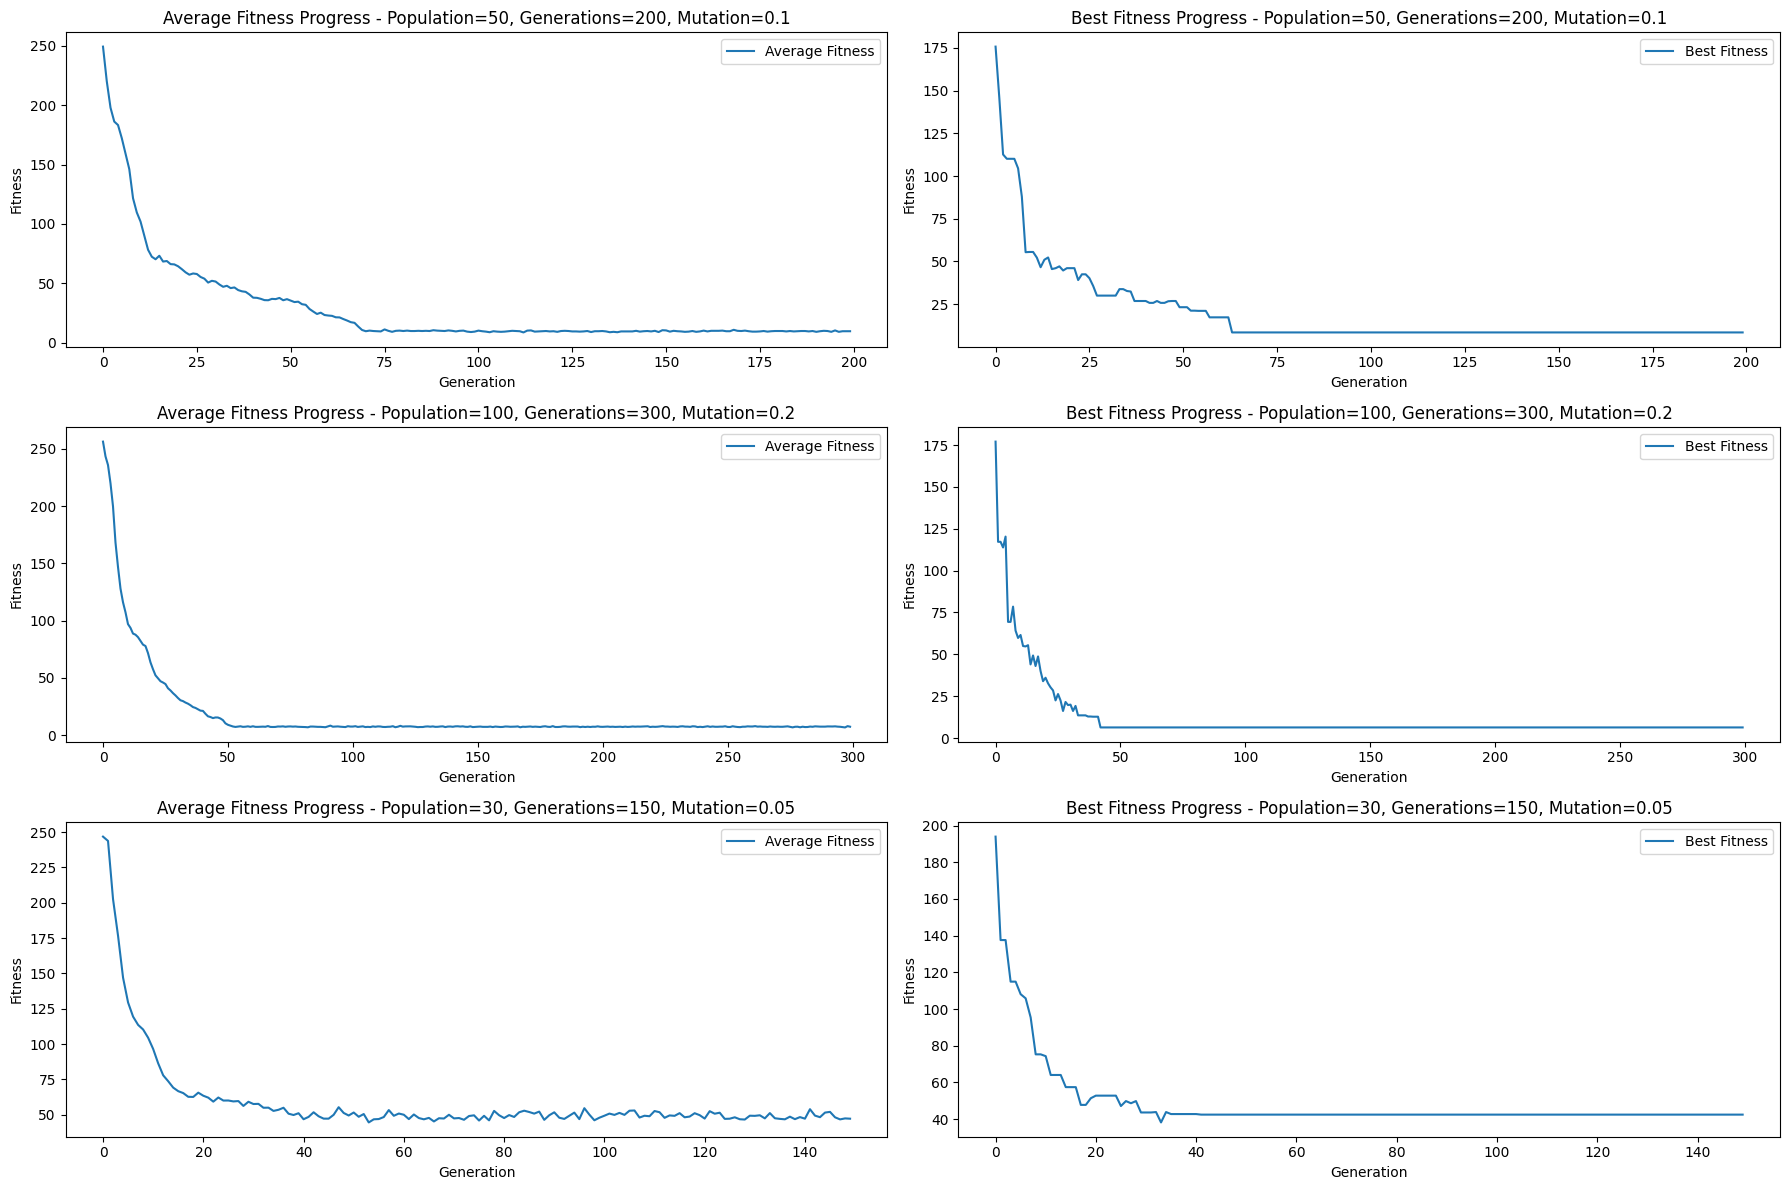

Result 1: Best solution: [7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7], Best cost: 8.48528137423857, Parameters: Population=50, Generations=200, Mutation=0.1
Result 2: Best solution: [9, 9, 9, 9, 9, 9, 9, 6, 9, 9, 9], Best cost: 6.324555320336759, Parameters: Population=100, Generations=300, Mutation=0.2
Result 3: Best solution: [5, 5, 3, 10, 9, 9, 6, 0, 5, 5, 5], Best cost: 42.44375697289405, Parameters: Population=30, Generations=150, Mutation=0.05


In [1251]:
# Function to run the genetic algorithm with specified parameters
def run_genetic_algorithm(coordinates, population_size, generations, mutation_rate):
    best_solution, best_cost, avg_fitness_progress, best_fitness_progress = genetic_algorithm(coordinates, population_size, generations, mutation_rate)
    return best_solution, best_cost, avg_fitness_progress, best_fitness_progress

# Function to execute the genetic algorithm with different parameters and return the results
def run_genetic_algorithm_with_params(coordinates, params):
    population_size, generations, mutation_rate = params
    best_solution, best_cost, avg_fitness_progress, best_fitness_progress = run_genetic_algorithm(coordinates, population_size, generations, mutation_rate)
    return best_solution, best_cost, avg_fitness_progress, best_fitness_progress, params

# Parameters for the genetic algorithm (population size, generations, mutation rate)
parameter_sets = [
    (50, 200, 0.1),  # Parameter set 1
    (100, 300, 0.2),  # Parameter set 2
    (30, 150, 0.05)   # Parameter set 3
]

# Execute the genetic algorithm for each parameter set
results = []
for params in parameter_sets:
    best_solution, best_cost, avg_fitness_progress, best_fitness_progress, used_params = run_genetic_algorithm_with_params(coordinate, params)
    results.append((best_solution, best_cost, avg_fitness_progress, best_fitness_progress, used_params))

# Visualize the progress of average fitness and best fitness for each parameter set
plt.figure(figsize=(18, 12))

for i, result in enumerate(results):
    best_solution, best_cost, avg_fitness_progress, best_fitness_progress, params = result
    label = f'Population={params[0]}, Generations={params[1]}, Mutation={params[2]}'
    
    plt.subplot(len(results), 2, 2*i + 1)
    plt.plot(avg_fitness_progress, label='Average Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title(f'Average Fitness Progress - {label}')
    plt.legend()

    plt.subplot(len(results), 2, 2*i + 2)
    plt.plot(best_fitness_progress, label='Best Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title(f'Best Fitness Progress - {label}')
    plt.legend()

plt.tight_layout()
plt.show()

# Display the final results of each execution
for i, result in enumerate(results):
    best_solution, best_cost, _, _, params = result
    print(f"Result {i + 1}: Best solution: {best_solution}, Best cost: {best_cost}, Parameters: Population={params[0]}, Generations={params[1]}, Mutation={params[2]}")

**Resultado 1:**
+ Esta solução indica que a cidade 7 foi visitada repetidamente, o que pode sugerir que o algoritmo pode estar preso num mínimo local ou a enfrentar problemas de diversidade genética na população. Isso pode ser consequência da taxa de mutação não ser alta o suficiente para explorar adequadamente o espaço de soluções.
+ O custo da melhor solução encontrada é razoavelmente baixo, o que sugere que apesar da repetição de cidades, o algoritmo conseguiu encontrar um caminho com uma distância consideravelmente curta entre as cidades.
+ Uma população de 50 indivíduos foi usada, com 200 gerações de evolução, e uma taxa de mutação de 10%. Este conjunto de parâmetros pode ser insuficiente para explorar amplamente o espaço de soluções, resultando numa convergência prematura para soluções subótimas.

**Resultado 2:**
+ Novamente, a cidade 9 é dominante na solução encontrada, o que indica que pode haver um problema na diversidade genética ou na eficácia do crossover e mutação para explorar novas soluções.
+ Este é um custo muito baixo, sugerindo que o algoritmo encontrou uma solução muito eficiente para o TSP. Tal pode ser atribuído à alta taxa de mutação, que permite explorar amplamente o espaço de soluções.
+ Aqui, uma população maior de 100 indivíduos foi utilizada, com 300 gerações e uma taxa de mutação de 20%. Esses parâmetros parecem ter sido mais eficazes na descoberta de uma solução de menor custo em comparação com o Resultado 1.

**Resultado 3:**
+ Esta solução mostra mais variedade nas cidades visitadas, embora ainda haja repetições. Isso pode indicar uma falta de diversidade na população ou necessidade de ajuste nos operadores genéticos.
+ O custo desta solução é bastante alto, sugerindo que o algoritmo pode não ter encontrado uma solução muito eficiente. Tal pode ser resultado de uma população menor ou de um número insuficiente de iterações para permitir a convergência para uma solução melhor.
+ Este conjunto de parâmetros apresenta uma população menor de 30 indivíduos, com 150 gerações e uma taxa de mutação baixa de 5%. A baixa taxa de mutação pode limitar a exploração do espaço de soluções, contribuindo para a menor eficiência na procura.

**Conclusão** 
Os resultados sugerem que ajustes nos parâmetros do algoritmo genético são necessários para aprimorar a eficiência na procura pela solução ótima do TSP. Explorar diferentes combinações de população, gerações e taxas de mutação pode ajudar a encontrar um equilíbrio entre exploração do espaço de soluções e investigação das melhores soluções encontradas. Além disso, otimizações nos operadores genéticos, como o crossover e a mutação, são cruciais para aumentar a diversidade genética na população e evitar a convergência prematura para soluções subótimas.
